In [2]:
from qwak.qwak import QWAK

In [3]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt, ceil, pow
import scipy.special as sp
from scipy.linalg import expm

In [4]:
def stream_path(n,alpha):
    B = np.matrix(np.zeros((n,n), dtype='complex'))
    for x in range(n-1):
        B[x,x+1] = np.exp(1j*alpha)

    return B + B.H

def inf_line_bessel(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        psi[x,0] = 1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)/np.sqrt(2)
        psi[x,0] += 1j**(np.abs(domain[x]-x0-1))*sp.jv(np.abs(domain[x] - x0 - 1), 2*t)/np.sqrt(2)

    return np.abs(np.array(psi))**2

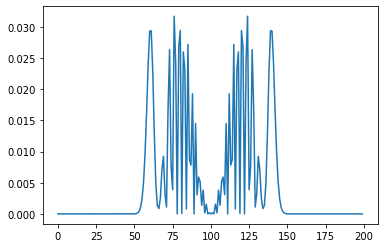

In [73]:
n=200
x0 = 0
n1 = 100
t  = 20
alpha=np.pi/2
# print(stream_path(n,alpha))
# print()
H = nx.path_graph(n,create_using=nx.DiGraph)
G = H.reverse()

for u,v,d in H.edges(data=True):
    d["weight"] = np.exp(1j*alpha)
    mat = np.matrix(d["weight"])

for u,v,d in G.edges(data=True):
    d["weight"] = np.exp(-1j*alpha)
    mat = np.matrix(d["weight"])

graph = nx.compose(H,G)

qw2 = QWAK(graph)
qw2.runWalk(t,[n//2-3,n//2 +3])
plt.plot(qw2.getProbDistVec())
# print(qw2.getAdjacencyMatrix())
# print()
# print(np.matrix(qw2.getAdjacencyMatrix()).round(decimals=0) == np.matrix(stream_path(n,alpha)).round(decimals=0))

# psi_bessel = inf_line_bessel(x0,n1,t,alpha)
# plt.plot(psi_bessel)

In [70]:
# def inf_line_bessel_oriented(x0,nx,t,alpha):
#     domain = np.arange(x0 - nx, x0 + nx + 1)
#     psi = np.zeros([2*nx + 1,1], dtype='complex')
#
#     for x in range(2*nx + 1):
#         psi[x,0] = (np.exp(-1j*alpha/2))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)/np.sqrt(2)
#         psi[x,0] += (np.exp(1j*alpha/2))*1j**(np.abs(domain[x]-x0-1))*sp.jv(np.abs(domain[x] - x0 - 1), 2*t)/np.sqrt(2)
#
#     return np.abs(np.array(psi))**2

In [18]:
# x0 = 100
# n0 = 100
# t  = 20
# alpha=np.pi/2
#
# psi_oriented = inf_line_bessel_oriented(x0,n0,t,alpha)
# plt.plot(psi_oriented)

In [11]:
# def inf_line_bessel_oriented2(x0,nx,t,alpha):
#     domain = np.arange(x0 - nx, x0 + nx + 1)
#     prob = np.zeros([2*nx + 1,1], dtype='complex')
#
#     for x in range(2*nx + 1):
#         prob[x,0] = (1/2)*(
#                         -1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t)**2
#
#                        - 1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)**2
#
#                        +(np.exp(1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)
#
#                        +(np.exp(-1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))
#
#     return prob

In [12]:
# x0 = 1
# n0 = 100
# t  = 20
# alpha=np.pi/2
#
# psi_oriented = inf_line_bessel_oriented2(x0,n0,t,alpha)
# plt.plot(psi_oriented)

In [92]:
def inf_line_bessel_oriented3(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        # prob[x,0] = (1/2)*(
        #                 sp.jv(np.abs(domain[x] + x0), 2*t)**2
        #
        #                +sp.jv(np.abs(domain[x] - x0), 2*t)**2
        #
        #                -2* np.cos(-2*alpha)*sp.jv(np.abs(domain[x] + x0), 2*t)*sp.jv(np.abs(domain[x] - x0), 2*t))

        prob[x,0] = (1/2)*(
                        sp.jv(domain[x] + x0, 2*t)**2

                       +sp.jv(domain[x] - x0, 2*t)**2

                       -2* np.cos(-2*alpha*x0)*sp.jv(domain[x] + x0, 2*t)*sp.jv(domain[x] - x0, 2*t))


    return prob


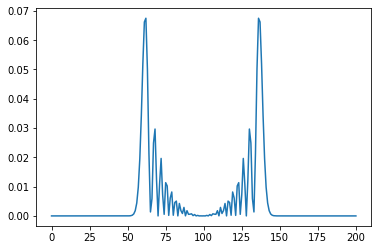

In [93]:
x0 = 1
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented3(x0,n0,t,alpha)
plt.plot(psi_oriented)

In [146]:
def psi_bessel(x0,nx,t,alpha,x):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')
    psi[x,0] = (1/np.sqrt(2)) * (np.exp(-1j*alpha*(x+x0))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t) + np.exp(-1j*alpha*(x-x0))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t))
    return psi

def psi_bessel_conjugate(x0,nx,t,alpha,x):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')
    psi[x,0] = np.conjugate((1/np.sqrt(2)) * (np.exp(-1j*alpha*(x+x0))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t) + np.exp(-1j*alpha*(x-x0))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)))
    return psi

def inf_line_bessel_oriented4(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        prob[x,0] = psi_bessel(x0,nx,t,alpha,x)[x,0] * psi_bessel_conjugate(x0,nx,t,alpha,x)[x,0]
    return prob

[[-8.35633704e-28-1.0357981e-43j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e

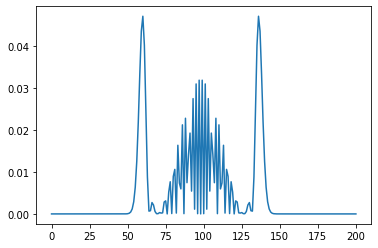

In [58]:
x0 = 2
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented4(x0,n0,t,alpha)
plt.plot(psi_oriented)


In [ ]:
# print(qw2.getProbDistVec().round(decimals=0) == psi_oriented.round(decimals=0))


In [19]:
def inf_line_bessel_oriented5(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        prob[x,0] = (1/2)*(
                        1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t)*np.conjugate(1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))

                       + 1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)*np.conjugate(1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0),2*t))

                       +(np.exp(1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)

                       +(np.exp(-1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))

    return prob

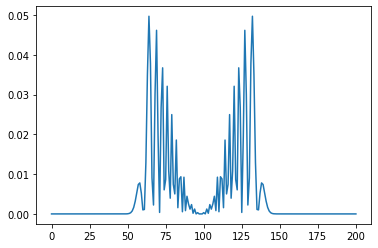

In [55]:
x0 = 2
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented5(x0,n0,t,alpha)
plt.plot(psi_oriented)

In [61]:
def inf_line_bessel_oriented6(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        prob[x,0] = (1/2)*(
                        sp.jv(np.abs(domain[x] + x0), 2*t)**2

                       + sp.jv(np.abs(domain[x] - x0), 2*t)**2

                       +(np.exp(1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)

                       +(np.exp(-1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))

    return prob

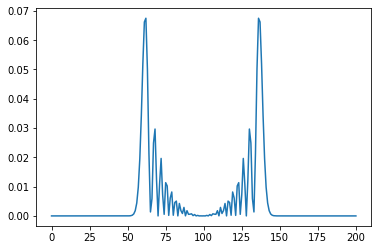

In [62]:
x0 = 1
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented6(x0,n0,t,alpha)
plt.plot(psi_oriented)

In [94]:
def inf_line_bessel_oriented7(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        # prob[x,0] = (1/2)*(
        #                 sp.jv(np.abs(domain[x] + x0), 2*t)**2
        #
        #                + sp.jv(np.abs(domain[x] - x0), 2*t)**2
        #
        #                -(np.exp(1j*2*alpha))*np.conjugate(sp.jv(np.abs(domain[x] + x0), 2*t))*sp.jv(np.abs(domain[x] - x0), 2*t)
        #
        #                -(np.exp(-1j*2*alpha))*np.conjugate(sp.jv(np.abs(domain[x] - x0), 2*t))*sp.jv(np.abs(domain[x] + x0), 2*t))

        prob[x,0] = (1/2)*(
                        sp.jv(domain[x] + x0, 2*t)**2

                       + sp.jv(domain[x] - x0, 2*t)**2

                       -(np.exp(1j*2*alpha))*(sp.jv(domain[x] + x0, 2*t))*sp.jv(domain[x] - x0, 2*t)

                       -(np.exp(-1j*2*alpha))*(sp.jv(domain[x] - x0, 2*t))*sp.jv(domain[x] + x0, 2*t))

    return prob

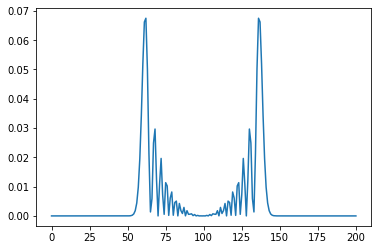

In [98]:
x0 = 1
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented7(x0,n0,t,alpha)
plt.plot(psi_oriented)

In [130]:
def inf_line_bessel_oriented8(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx):
        prob[x,0] = (1/2)*(
                        sp.jv(domain[x] + x0, 2*t)**2

                       + sp.jv(domain[x] - x0, 2*t)**2

                       -2*(np.cos(2*alpha))*(sp.jv(domain[x] + x0, 2*t))*sp.jv(domain[x] - x0, 2*t))

    return prob

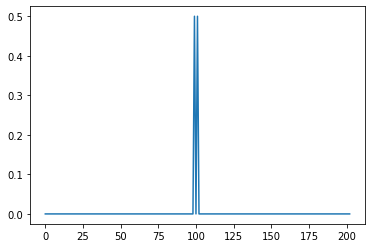

In [133]:
x0 = 1
n0 = 101
t  = 0
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented8(x0,n0,t,alpha)
plt.plot(psi_oriented)

In [134]:
print(psi_oriented[99])
print(psi_oriented[100])
print(psi_oriented[101])
print(psi_oriented[102])

[0.5+0.j]
[0.+0.j]
[0.5+0.j]
[0.+0.j]


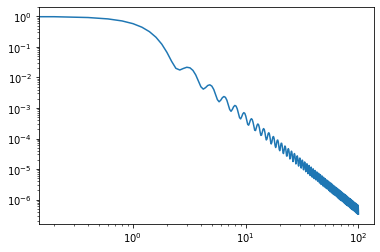

In [169]:
x0 = 1
n0 = 100
t  = 0
alpha=np.pi/2
alphaList=[np.pi/2,0,np.pi/4]
timeList = np.linspace(0,100,500)
prob = []
probList = []

for t in timeList:
    psi_oriented = inf_line_bessel_oriented8(x0,n0,t,alpha)
    # print(psi_oriented[99])
    # print(psi_oriented[100])
    # print(psi_oriented[101])
    # print(psi_oriented[102])
    probList.append(np.sum(psi_oriented[n0-x0-2:n0+1]))

# plt.xticks(timeList)
plt.loglog()
plt.plot(timeList,probList)